# Analisis Basico de Datos con Python

### Importamos la libreria de Pandas

La librerias nos brinda la facilidad de carga de archivos a nuestro ambiente mediante dataframe

In [5]:
from pathlib import Path
import pandas as pd

Procedemos a importar el dataset en este caso se llama Methane_final.csv como en este caso el archivo se encuentra en el mismo directorio que la notebook solo se coloca el nombre del archivo con su extensión y como esta separado por comas "," no es necesario especificar el separador

In [7]:
data_folder = Path().cwd().parent / 'data'

work_folder =  data_folder / 'global_emissions' 

csv_file = work_folder / 'Methane_final.csv'

df = pd.read_csv(csv_file)

La variable df de tipo DataFrame ahora contiene los datos del archivo ".csv" que cargamos

## Empezaremos con lo que son los Analisis de Exploracion de Datos o como se le conoce en ingles Exploration Data Analisis (EDA)

El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.
Fuente:https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

Para echar un vistazo más de cerca a los datos empezamos utilizando la función ".head()" de pandas que devuelve las primeras cinco lineas del Dataframe.

In [8]:
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


De manera similar, utilizamos la función ".tail()" que nos devuelve las últimas cinco lineas del Dataframe.

In [9]:
df.tail()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
1547,1547,World,World,70758.710938,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


Asi como la función ".shape" que nos da el número total de filas y columnas en el Dataframe en el output (filas,columnas).

In [10]:
df.shape

(1548, 9)

Una vez conocemos el tamaño del Dataframe y hemos visualizado su valor inicial y final podemos a explorar un poco más a nivel tecnico.
Gracias a la funcion ".info()" que nos brinda una vista detalla de la extructura del DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


Como podemos ver nos ha mostrado el tamaño del Dataframe, sus indices, los tipos de datos de cada columna.
si vemos con detalle solo ha captado la columna "emisiones" de tipo "float64" y las demas columnas de tipo object.

Para cambiar el tipo de las columnas utilizaremos la función DataFrame.astype() como veremos en el siguiente paso

In [12]:
df=df.astype({"region":"string","country":"string","emissions": float,"type":"string","segment":"string","reason":"string","baseYear":"string","notes":"string"})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   string 
 2   country     1548 non-null   string 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   string 
 5   segment     1548 non-null   string 
 6   reason      1548 non-null   string 
 7   baseYear    1548 non-null   string 
 8   notes       1548 non-null   string 
dtypes: float64(1), int64(1), string(7)
memory usage: 109.0 KB


Procedemos ahora con la funcion ".describe()" para obtener varias estadísticas de resumen. Esta función devuelve el recuento, la media, la desviación estándar, los valores mínimo y máximo y los cuantiles de los datos.

In [14]:
df.describe()

,Unnamed: 0,emissions
count,1548.000000,1548.000000
mean,773.500000,643.255972
std,447.013423,5566.238201
min,0.000000,0.000459
25%,386.750000,2.659361
50%,773.500000,24.064669
75%,1160.250000,128.419594
max,1547.000000,141953.765625


Revisamos si contamos con algun valor NULL en las columnas

In [15]:
df.isnull().sum()

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

## Importaremos la libreria MATPLOTIB.PYPLOT 

La utilizaremos para realizar una pequeña exploracion de datos

In [16]:
import matplotlib.pyplot as plt

Crearemos un nuevo DataFrame pero esta vez resumido en el cual agruparemos los valores por "region" y sumaremos las emisiones

In [17]:
emisionxregion = df.groupby("region")["emissions"].sum()

Procedemos a crear un grafico de barras utilizando la libreria matplotlib.plot.bar como vemos a continuación

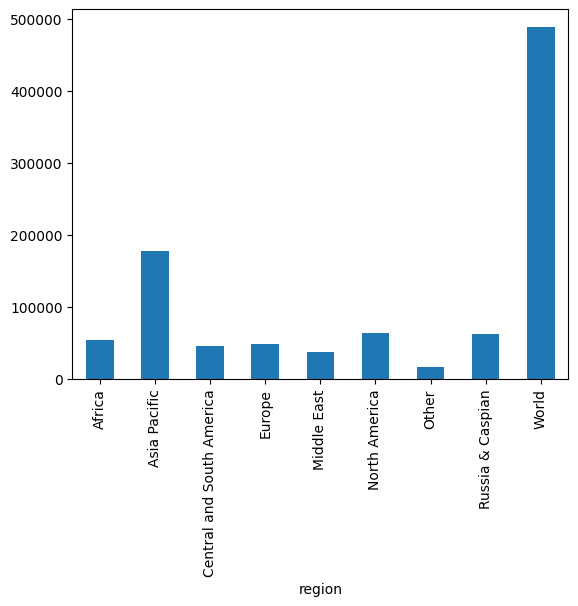

In [18]:
emisionxregion.plot.bar()
plt.show()

Notamos que el la "region" con valor "World" no es relevante para este analisis procedemos a elimanarle con la funcion "drop" como vemos a continuación asignandolo a un nuevo dataframe

In [19]:
nwexr=emisionxregion.drop("World")

Una vez eliminado procedemos a validar nuevamente ejecutando el comando nuevamente  

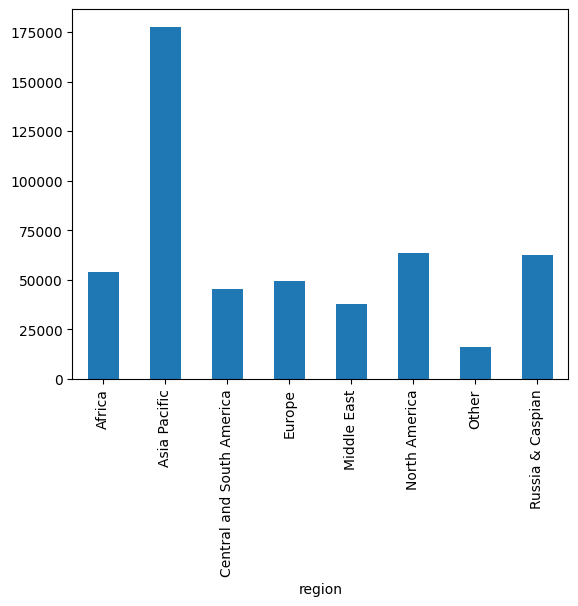

In [20]:
nwexr.plot.bar()
plt.show()

Como podemos observar desaparecio la "región" de "World" permitiendonos ver dichas emisiones por region asi como la cantidad emisiones de cada region comparada con las demás regiones  

Si deseamos ver el grafico por participación en las emisiones totales lo podemos hacer mediante un grafico de pie como vemos a continuación

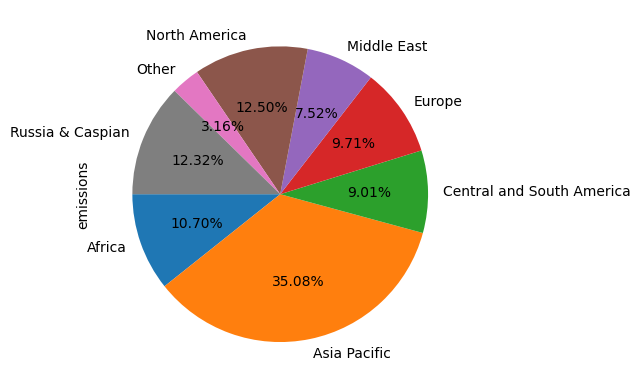

In [21]:
nwexr.plot.pie(startangle = 180,autopct='%1.2f%%')
plt.show()